In [1]:
# Import all necessary libraries and setup the environment for matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation, metrics

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# define the path of data
raw_data_train = scipy.io.loadmat('train_32x32.mat')
raw_data_test = scipy.io.loadmat('test_32x32.mat')

In [3]:
#raw_data_train = scipy.io.loadmat('/COMP5318/train_32x32.mat')
data_train = np.hstack((np.hstack((raw_data_train.get('X')[:, :, 0],
                                   raw_data_train.get('X')[:, :, 1])),
                        raw_data_train.get('X')[:, :, 2]))
data_train = np.reshape(data_train,(-1,73257)).T
label_train = raw_data_train.get('y')
label_train[label_train==10]=0

#raw_data_test = scipy.io.loadmat('/COMP5318/test_32x32.mat')
data_test = np.hstack((np.hstack((raw_data_test.get('X')[:, :, 0],
                                   raw_data_test.get('X')[:, :, 1])),
                        raw_data_test.get('X')[:, :, 2]))
data_test = np.reshape(data_test,(-1,26032)).T
label_test = raw_data_test.get('y')
label_test[label_test==10]=0

In [6]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=120)
clf = clf.fit(data_train, label_train)
predict_test = clf.predict(data_test)
print(clf.score(data_test, label_test))

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6857713583282115
Wall time: 7min 15s


Confusion matrix, without normalization
[[1022  201  120   94  119   29   84   23   17   35]
 [  32 4661  121   89   79   15   24   68    6    4]
 [  15  383 3233  158  198   32   28   62   22   18]
 [  14  607  196 1703  113  115   28   25   26   55]
 [  20  307   98   57 1948   19   37   10    7   20]
 [  22  298  136  192  120 1401  129   10   42   34]
 [  73  205   99   66  204   87 1176   14   48    5]
 [  15  486  262   57   27   12   14 1138    5    3]
 [  41  186  110   93  138   73  240    7  725   47]
 [  70  217  144   76  128   59   19   11   26  845]]


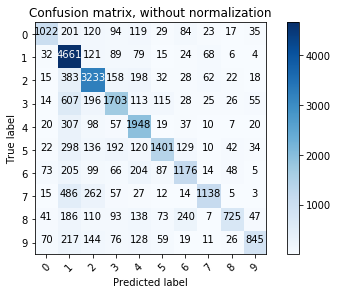

In [8]:
from sklearn.metrics import confusion_matrix
import itertools

#label_test[label_test == 10] = 0
#predict_test[predict_test==10] = 0
class_names = [0,1,2,3,4,5,6,7,8,9]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, predict_test,labels=[0,1,2,3,4,5,6,7,8,9])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

In [9]:
!pip install prettytable
from prettytable import PrettyTable


In [10]:
#GET precision,recall,F1 and support score for each label

label=np.arange(0,10)
x = PrettyTable(['Label', 'Precision', 'recall', 'F1-score','Support'])
for i in label:
  TP=cnf_matrix[i,i]
  FN = np.sum(cnf_matrix[i]) - TP
  FP = np.sum(cnf_matrix[:, i]) - TP
  TN = np.sum(cnf_matrix) - TP - FN - FP
  precision =(TP / (TP + FP))
  recall = TP / (TP + FN)
  F_measure = TP / (2*TP + FP + FN)
  Support= (TP + FN)
  x.add_row([label[i],round(precision,3),round(recall,3), round(F_measure,3),round(Support,0)])
print('Table 1. Precision,Recall,F1 and Support score for each label')
print(x)

Table 1. Precision,Recall,F1 and Support score for each label
+-------+-----------+--------+----------+---------+
| Label | Precision | recall | F1-score | Support |
+-------+-----------+--------+----------+---------+
|   0   |   0.772   | 0.586  |  0.333   |   1744  |
|   1   |   0.617   | 0.914  |  0.368   |   5099  |
|   2   |   0.715   | 0.779  |  0.373   |   4149  |
|   3   |   0.659   | 0.591  |  0.312   |   2882  |
|   4   |   0.634   | 0.772  |  0.348   |   2523  |
|   5   |   0.761   | 0.588  |  0.332   |   2384  |
|   6   |   0.661   | 0.595  |  0.313   |   1977  |
|   7   |   0.832   | 0.564  |  0.336   |   2019  |
|   8   |   0.785   | 0.437  |  0.281   |   1660  |
|   9   |   0.793   |  0.53  |  0.318   |   1595  |
+-------+-----------+--------+----------+---------+
